In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mne

In [ ]:
import tarfile
import mne
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd

## 1. Load data

In [ ]:
# Get link of all file
mypath = "/content/drive/MyDrive/all_group"
onlyfiles = [f  for f in listdir(mypath) if isfile(join(mypath, f)) and ("fif" in f)]

In [ ]:
# Read file contain label
csv_file = "/content/drive/MyDrive/all_group/filtered_subjects_with_age.tsv"
df = pd.read_csv(csv_file, sep='\t')

In [ ]:
x = df["participant_id"]

In [ ]:
# Delete all files that have no corresponding labels
files_to_remove = []

# Loop through the files and check for corresponding labels
for i in onlyfiles:
    subject_id = i.split("_")[0]
    if subject_id not in x.values:
        print(subject_id)
        files_to_remove.append(i)

# Remove files after the iteration to avoid modifying the list while iterating
for file in files_to_remove:
    onlyfiles.remove(file)

print(len(onlyfiles))

160


In [ ]:
# Assign label for each input
labels = np.zeros(len(onlyfiles))
for i in range(len(onlyfiles)):
  for j in range(len(df)):
    if onlyfiles[i].split("_")[0] == df["participant_id"][j]:
      labels[i] = df["age"][j]

In [ ]:
# Load raw data
def load_raw_data(file_path):
    raw = mne.io.read_raw_fif(file_path, preload=False)
    return raw

raws = []
for file in onlyfiles:
    file_path = join(mypath, file)
    raw = load_raw_data(file_path)
    raws.append(raw)

Opening raw data file /content/drive/MyDrive/all_group/sub-CC110033_sflip_parc-raw.fif...
    Range : 16750 ... 160249 =     67.000 ...   640.996 secs
Ready.
Opening raw data file /content/drive/MyDrive/all_group/sub-CC110037_sflip_parc-raw.fif...
    Range : 5000 ... 145499 =     20.000 ...   581.996 secs
Ready.
Opening raw data file /content/drive/MyDrive/all_group/sub-CC110045_sflip_parc-raw.fif...
    Range : 24000 ... 164499 =     96.000 ...   657.996 secs
Ready.
Opening raw data file /content/drive/MyDrive/all_group/sub-CC110056_sflip_parc-raw.fif...
    Range : 3750 ... 143999 =     15.000 ...   575.996 secs
Ready.
Opening raw data file /content/drive/MyDrive/all_group/sub-CC110069_sflip_parc-raw.fif...
    Range : 16500 ... 156999 =     66.000 ...   627.996 secs
Ready.
Opening raw data file /content/drive/MyDrive/all_group/sub-CC110087_sflip_parc-raw.fif...
    Range : 23000 ... 163999 =     92.000 ...   655.996 secs
Ready.
Opening raw data file /content/drive/MyDrive/all_group

In [ ]:
# # Only get 52 misc channel to use
misc_channels_arr = []
for raw in raws:
  misc_channels_arr.append(raw.copy().pick_types(misc=True))

## 2.Statistic about data

### Overview about dataset


*   The dataset includes EEG signals from 163 subjects (3 subjects have no labels)
*   It contains 69 data channels, including:
  *   52 "MISC" channels (containing brain activity data from different brain regions).
  *   17 Stimulus channels (related to external stimuli or other signals) – unrelated to brain activity.
*   The sampling frequency is 250 Hz, meaning the data is sampled 250 times per second (since continuous sampling is not possible, it captures one signal value every 1/250 second).







In [ ]:
# Number subject
print("Number subject have label", len(onlyfiles))

Number subject have label 160


### Info of a sample data

In [ ]:
raws[0].info

<Info | 11 non-empty values
 bads: []
 ch_names: parcel_0, parcel_1, parcel_2, parcel_3, parcel_4, parcel_5, ...
 chs: 52 misc, 17 Stimulus
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition OSL ...
 dig: 0 items
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 1916-01-09 10:21:05 UTC
 meas_id: 4 items (dict)
 nchan: 69
 projs: []
 sfreq: 250.0 Hz
>

In [ ]:
# Some detail info
info = raws[0].info
print(f"Số kênh: {len(info['ch_names'])}")
print(f"Tần số lấy mẫu: {info['sfreq']} Hz")
print(f"Dải lọc: {info['highpass']} - {info['lowpass']} Hz")
print(f"Thời lượng dữ liệu: {raws[0].n_times / info['sfreq']} giây")
print(f"Các loại kênh: {set([ch['kind'] for ch in info['chs']])}")

Số kênh: 69
Tần số lấy mẫu: 250.0 Hz
Dải lọc: 0.0 - 125.0 Hz
Thời lượng dữ liệu: 574.0 giây
Các loại kênh: {3 (FIFFV_STIM_CH), 502 (FIFFV_MISC_CH)}


In [ ]:
raw.ch_names[:10]

### Calculate mean, std, and test the distribution of data (only a channel of a subject)

In [ ]:
from scipy.stats import skew, kurtosis
from tabulate import tabulate

# Calculate mean, std, skewness, kurt of this data
data = raws[0] # calculate for subject 0
channel = "parcel_1" # channel parcel_1

channel_data = data[channel][0][0] # Get only data

mean_val = np.mean(channel_data)
std_val = np.std(channel_data)
skewness = skew(channel_data)
kurt = kurtosis(channel_data)
data = [1, -1, 2, -3]

# Visualize
data = {
    "Metric": ["Mean", "Standard Deviation", "Skewness", "Kurtosis"],
    "Value": [mean_val, std_val, skewness, kurt],
}

table = tabulate(data, headers="keys", tablefmt="fancy_grid")
print(table)



╒════════════════════╤══════════════╕
│ Metric             │        Value │
╞════════════════════╪══════════════╡
│ Mean               │ -9.58335e-11 │
├────────────────────┼──────────────┤
│ Standard Deviation │  2.45411     │
├────────────────────┼──────────────┤
│ Skewness           │ -0.00460905  │
├────────────────────┼──────────────┤
│ Kurtosis           │  0.625775    │
╘════════════════════╧══════════════╛


## 3.Visualize data

### Visualize the raw data

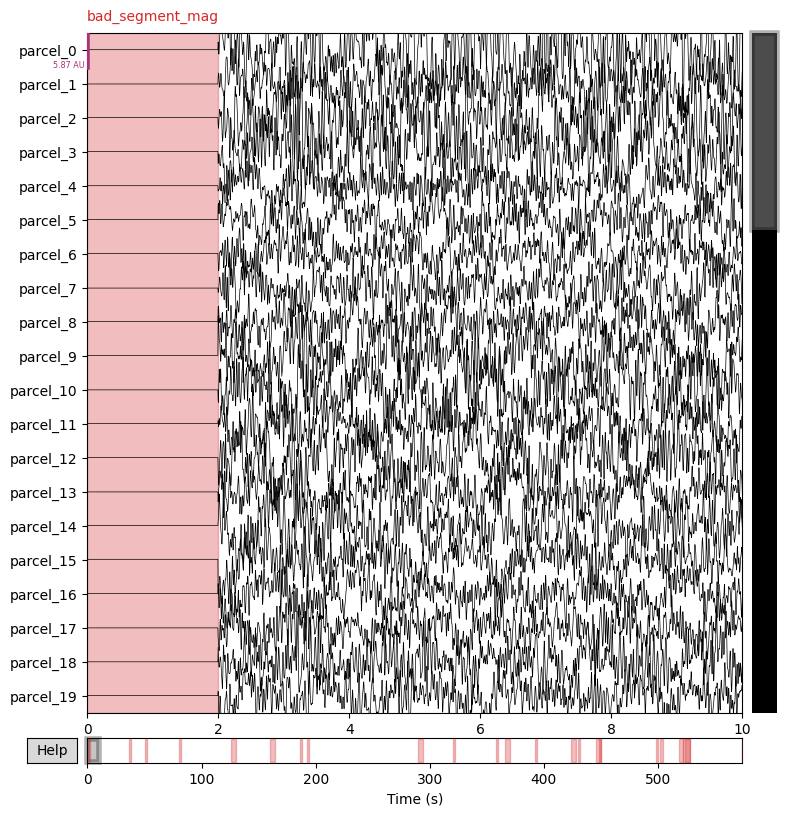

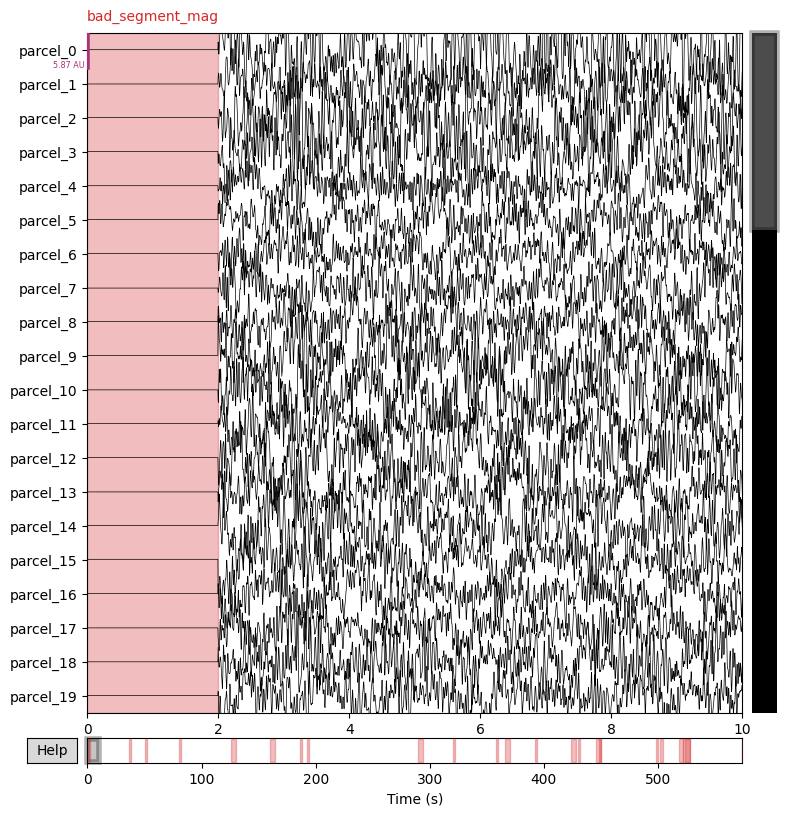

In [ ]:
# Get raw data of subject 0
subject_1 = raws[0].copy()

# Plot this raw data
subject_1.plot()

### Visualize data with events

In [ ]:
events = mne.find_events(raws[0], stim_channel='parcel_0', shortest_event=1)
print(events)

45022 events found on stim channel parcel_0
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[ 17249      0      1]
 [ 17254      0      1]
 [ 17255      1      2]
 ...
 [160239      0      2]
 [160240      2      3]
 [160245      2      3]]


<ipython-input-18-d516e3970b01>:1: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = mne.find_events(raws[0], stim_channel='parcel_0', shortest_event=1)


<ipython-input-19-2eed35591745>:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, sfreq=raws[0].info['sfreq'])


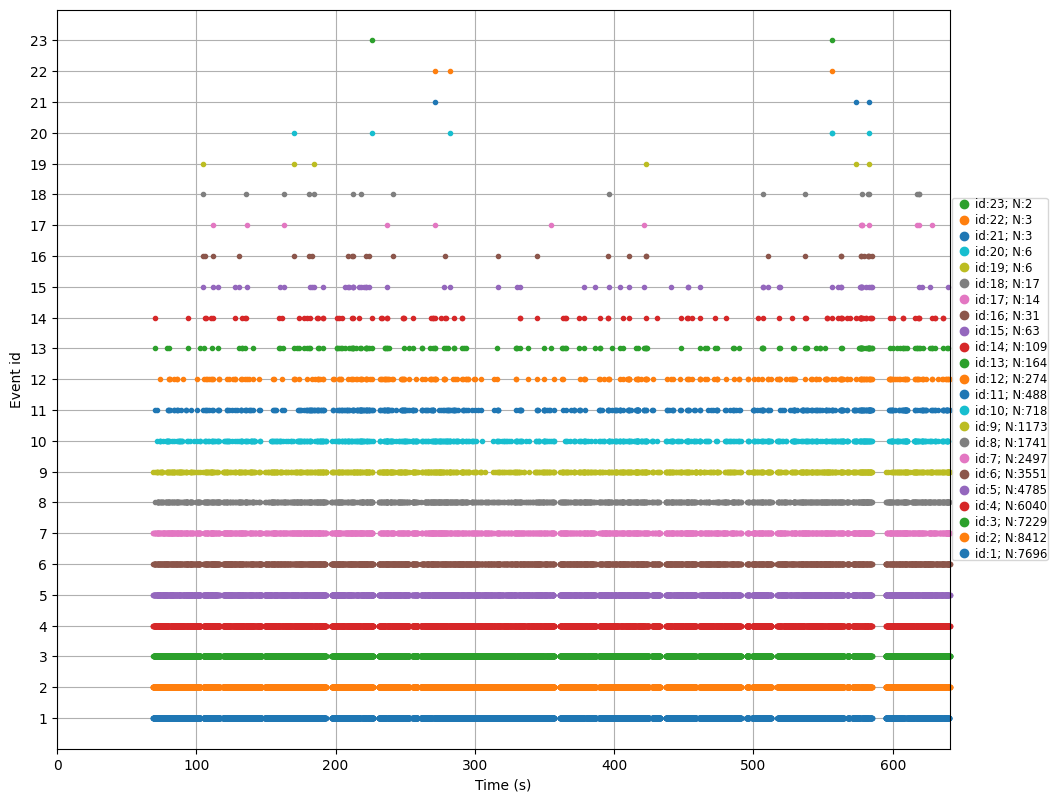

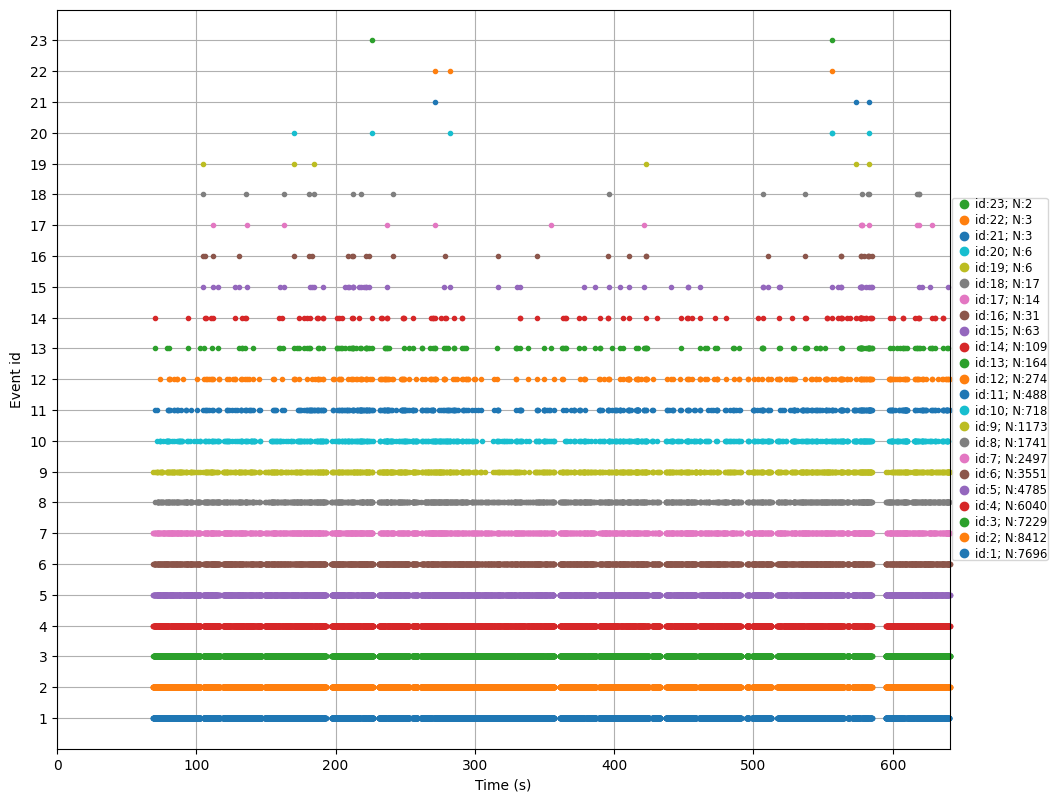

In [ ]:
# plot events
mne.viz.plot_events(events, sfreq=raws[0].info['sfreq'])

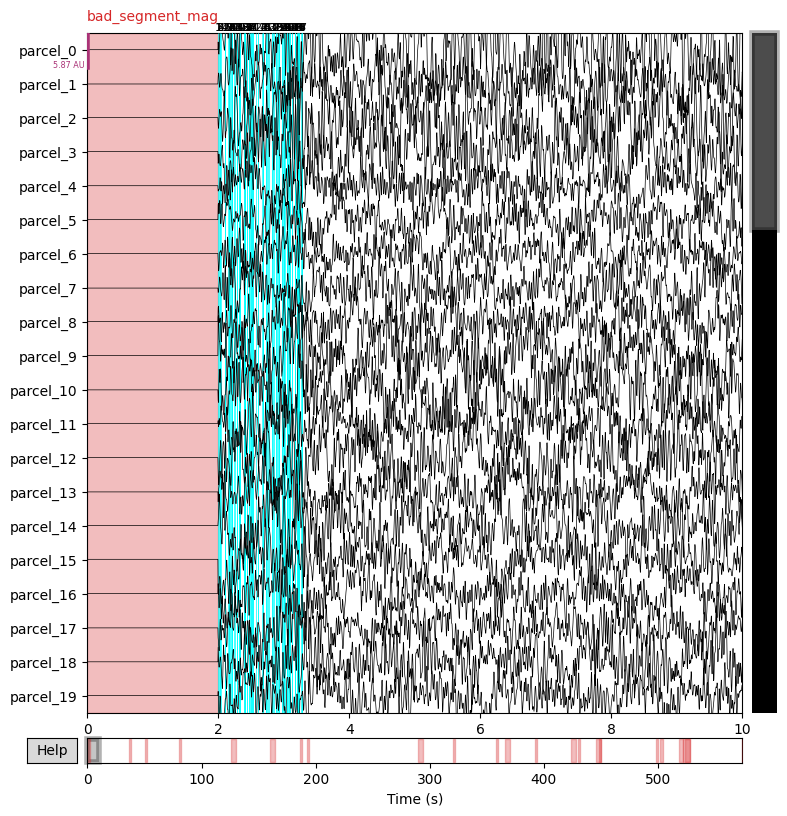

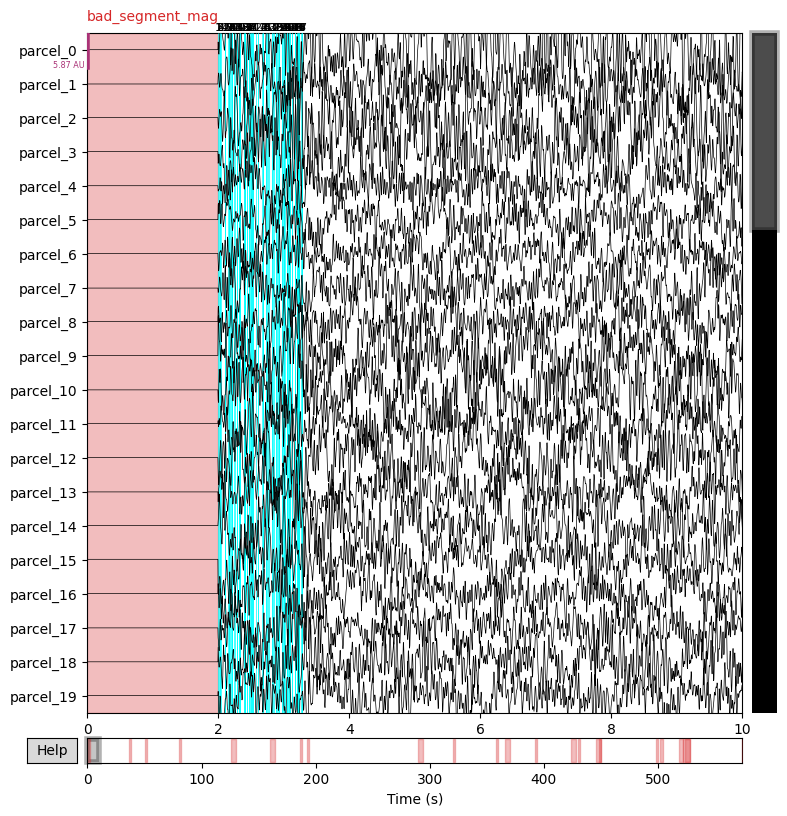

In [ ]:
subject_0 = raws[0].copy()
# Change event_id to a dictionary
subject_0.plot(events=events, event_id=None)

Not setting metadata
24 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 24 events and 176 original time points ...
4 bad epochs dropped


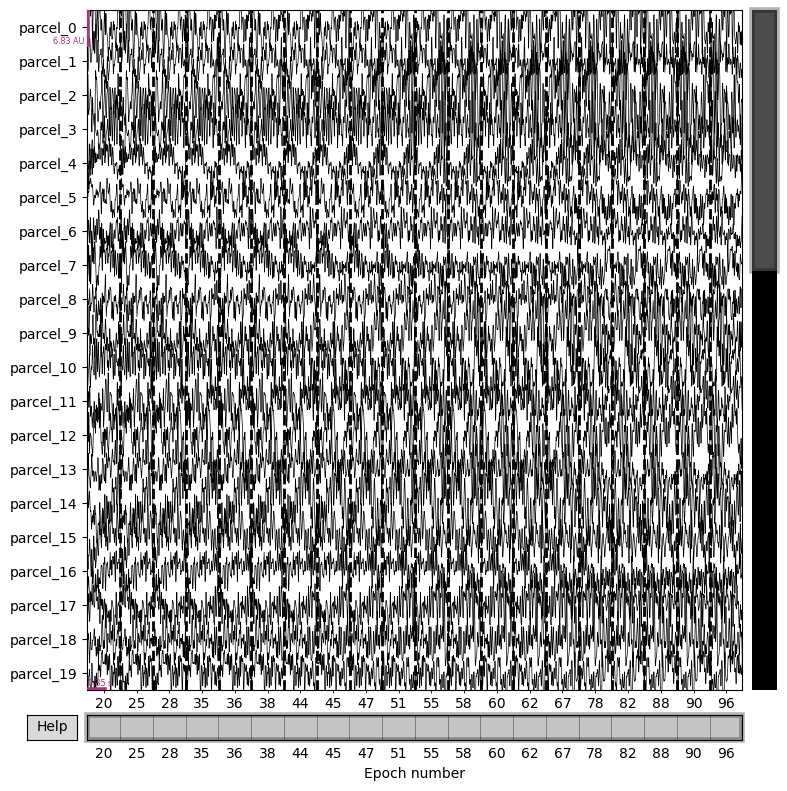

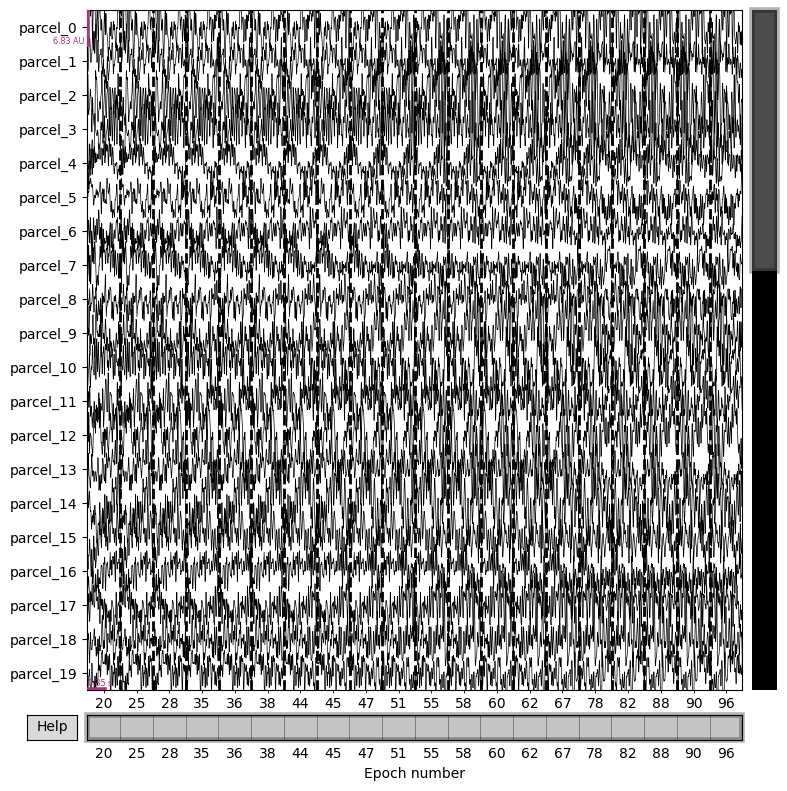

In [ ]:
# Divide epoch
epochs = mne.Epochs(raws[0].copy(), events, event_id=[1], preload=True)
epochs.plot(picks="misc")

### Visualize PSD of channels

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 14500 of 143500 (10.10%) samples to NaN, retaining 129000 (89.90%) samples.
Effective window size : 8.192 (s)


<ipython-input-57-909d7c5c542c>:3: RuntimeWarning: The unit for channel(s) parcel_0, parcel_1, parcel_10, parcel_11, parcel_12, parcel_13, parcel_14, parcel_15, parcel_16, parcel_17, parcel_18, parcel_19, parcel_2, parcel_20, parcel_21, parcel_22, parcel_23, parcel_24, parcel_25, parcel_26, parcel_27, parcel_28, parcel_29, parcel_3, parcel_30, parcel_31, parcel_32, parcel_33, parcel_34, parcel_35, parcel_36, parcel_37, parcel_38, parcel_39, parcel_4, parcel_40, parcel_41, parcel_42, parcel_43, parcel_44, parcel_45, parcel_46, parcel_47, parcel_48, parcel_49, parcel_5, parcel_50, parcel_51, parcel_6, parcel_7, parcel_8, parcel_9 has changed from NA to V.
  subject_1.set_channel_types({ch_name: 'eeg' for ch_name in raw.info['ch_names']})


At least one good data span is shorter than n_per_seg, and will be analyzed with a shorter window than the rest of the file.
Plotting power spectral density (dB=True).


/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 1000, using nperseg = 1000
  return _func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 1500, using nperseg = 1500
  return _func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 500, using nperseg = 500
  return _func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 500, using nperseg = 500
  return _func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 1, using nperseg = 1
  return _func(*args, **kwargs)
<ipython-input-57-909d7c5c542c>:4: RuntimeWarning: Channel l

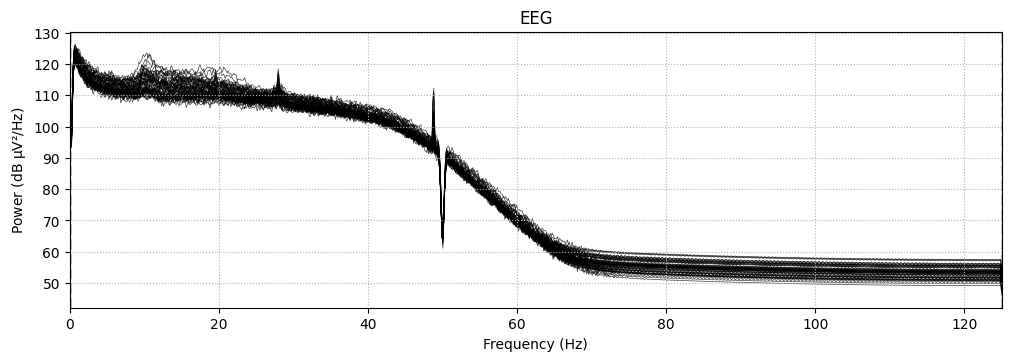

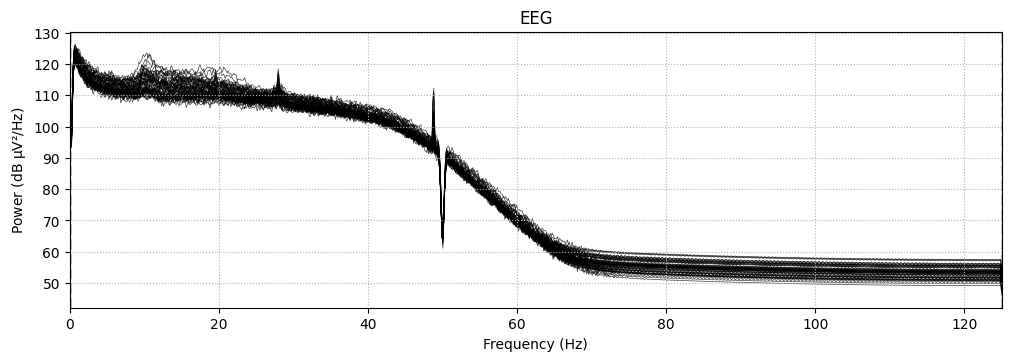

In [ ]:
# Plot the Power Spectral Density (PSD) graph of the channels with the type "eeg" after change name of "misc"
subject_1.pick_types(misc=True)
subject_1.set_channel_types({ch_name: 'eeg' for ch_name in raw.info['ch_names']})
subject_1.plot_psd(picks='eeg')



*   Visualize after bandpass-filter




Reading 0 ... 143499  =      0.000 ...   573.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 14500 of 143500 (10.10%) samples to NaN, retaining 129000 (89.90%) samples.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 8.192 (s)
At least one good data span is shorter than n_per_seg, and will be analyzed with a shorter window than the rest of the file.
Plotting power spectral density (dB=True).


/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 1000, using nperseg = 1000
  return _func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 1500, using nperseg = 1500
  return _func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 500, using nperseg = 500
  return _func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 500, using nperseg = 500
  return _func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 2048 is greater than input length  = 1, using nperseg = 1
  return _func(*args, **kwargs)
<ipython-input-59-558def2f248c>:3: RuntimeWarning: Channel l

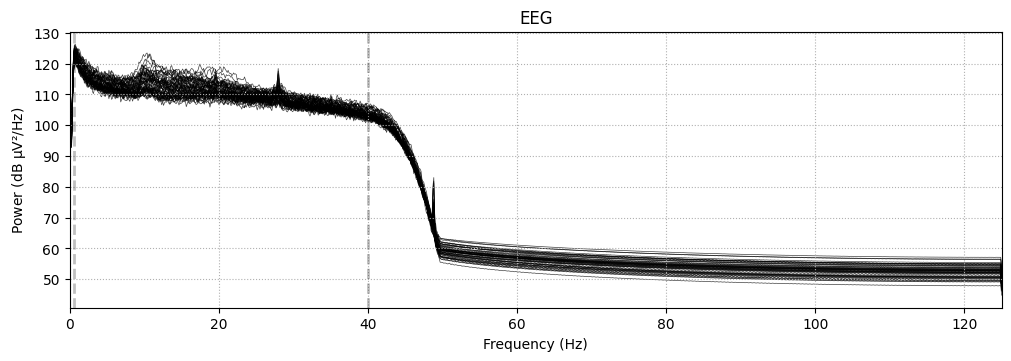

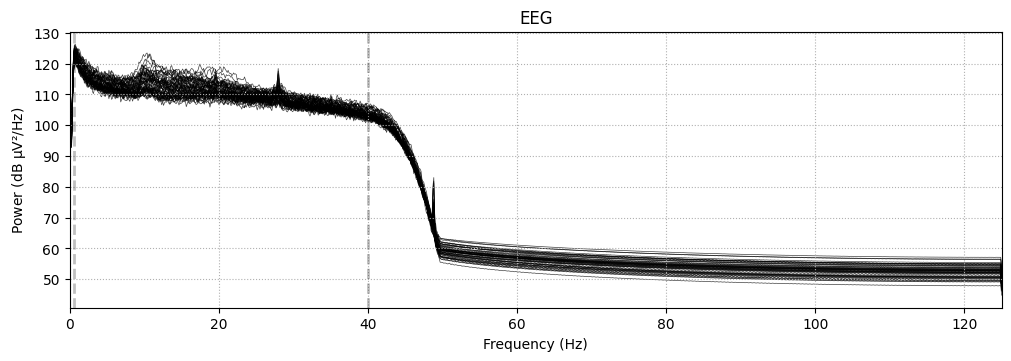

In [ ]:
subject_1.load_data()

# Bandpass-filter 0.5-40hz
filtered = subject_1.copy().filter(l_freq=0.5, h_freq=40)
filtered.plot_psd(picks='eeg')

### Visualize the distribution of label (age)

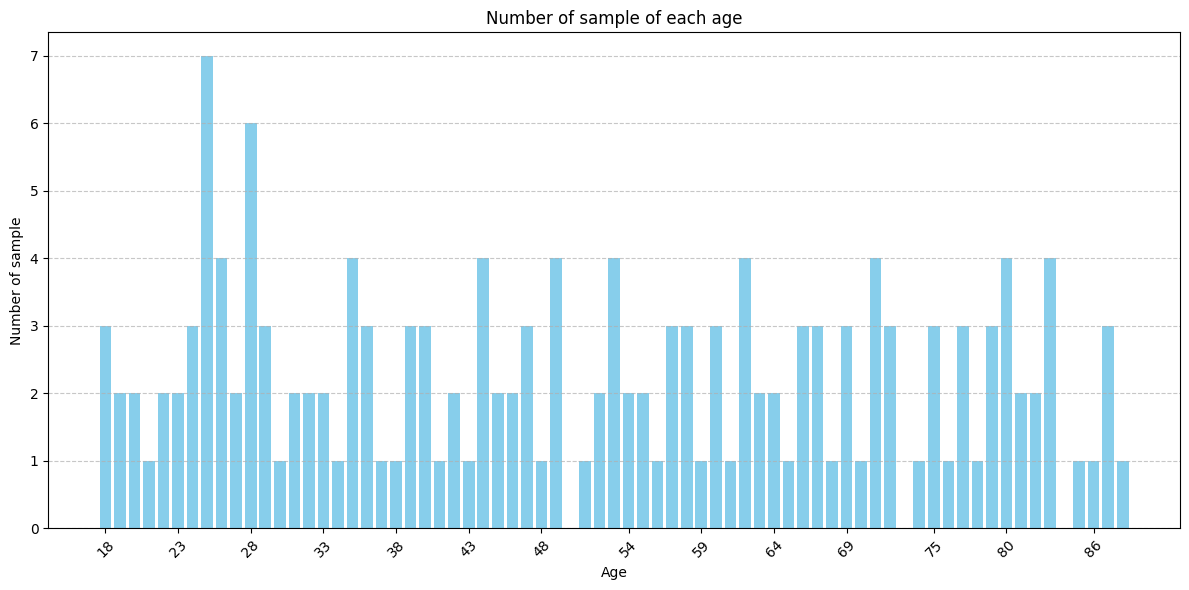

In [ ]:
unique_ages, counts = np.unique(labels, return_counts=True)

# Limit the number of show label
step = 5
plt.figure(figsize=(12, 6))
plt.bar(unique_ages, counts, color='skyblue')

plt.xticks(unique_ages[::step], rotation=45)

plt.title('Number of sample of each age')
plt.xlabel('Age')
plt.ylabel('Number of sample')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Showw plot
plt.show()



### Visualize the distribution about length of signal

In [ ]:
# Calculate the total time
total_durations = []
total_duration_alts = []
for raw in raws:
  total_durations.append(raw.times[-1])
  total_duration_alts.append(raw.n_times / raw.info['sfreq'])

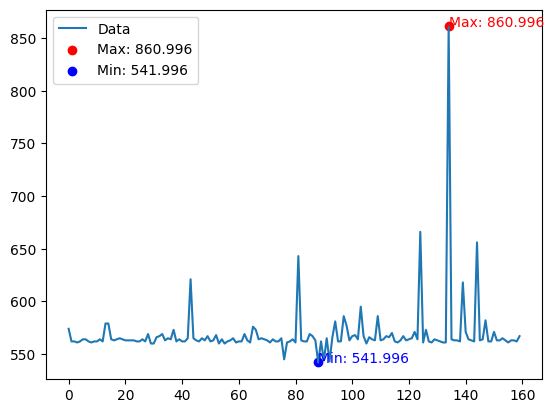

In [ ]:

# Find the max and min value of
max_value = max(total_durations)
min_value = min(total_durations)

# Find index of min and max value
max_index = total_durations.index(max_value)
min_index = total_durations.index(min_value)

# Show plot
plt.plot(total_durations, label="Data")

# Mark the max value
plt.scatter(max_index, max_value, color='red', label=f'Max: {max_value}')
plt.text(max_index, max_value, f'Max: {max_value}', color='red', fontsize=10)

# Mark the min value
plt.scatter(min_index, min_value, color='blue', label=f'Min: {min_value}')
plt.text(min_index, min_value, f'Min: {min_value}', color='blue', fontsize=10)

# Show plot
plt.legend()
plt.show()


### Visual EEG data of all subject

In [ ]:
def get_data(index, channel_name, start_time=2, end_time=70):
    """
    Extracts data from a specific channel at a given time range from raw data.

    Parameters:
    index (int): The index of the raw data in the list.
    channel_name (str): The name of the channel to extract data from.
    start_time (float): The start time in seconds (default is 2 seconds).
    end_time (float): The end time in seconds (default is 70 seconds).

    Returns:
    data (array): The data for the specified channel and time range.
    times (array): The corresponding time values for the extracted data.
    """
    sfreq = raws[index].info['sfreq']  # Sample frequency (Hz)

    # Convert time to sample index
    start_sample = int(sfreq * start_time)
    end_sample = int(sfreq * end_time)

    # Extract data and corresponding time for the given channel and time range
    data, times = raws[index][channel_name, start_sample:end_sample]

    return data, times

# Example usage:
channel_name = "parcel_1"
data, times_ = get_data(6, channel_name)


In [ ]:
data_arr = []

# Loop over all files
for i in range(len(onlyfiles)):
    data_i_subject = []

    # Loop over 52 channels (parcel_0 to parcel_51)
    for j in range(52):
        data, times_ = get_data(i, f"parcel_{j}")
        data_i_subject.append(data[0])  # Assuming you need the first value of the data

    data_arr.append(data_i_subject)


In [ ]:
data_arr = np.array(data_arr)

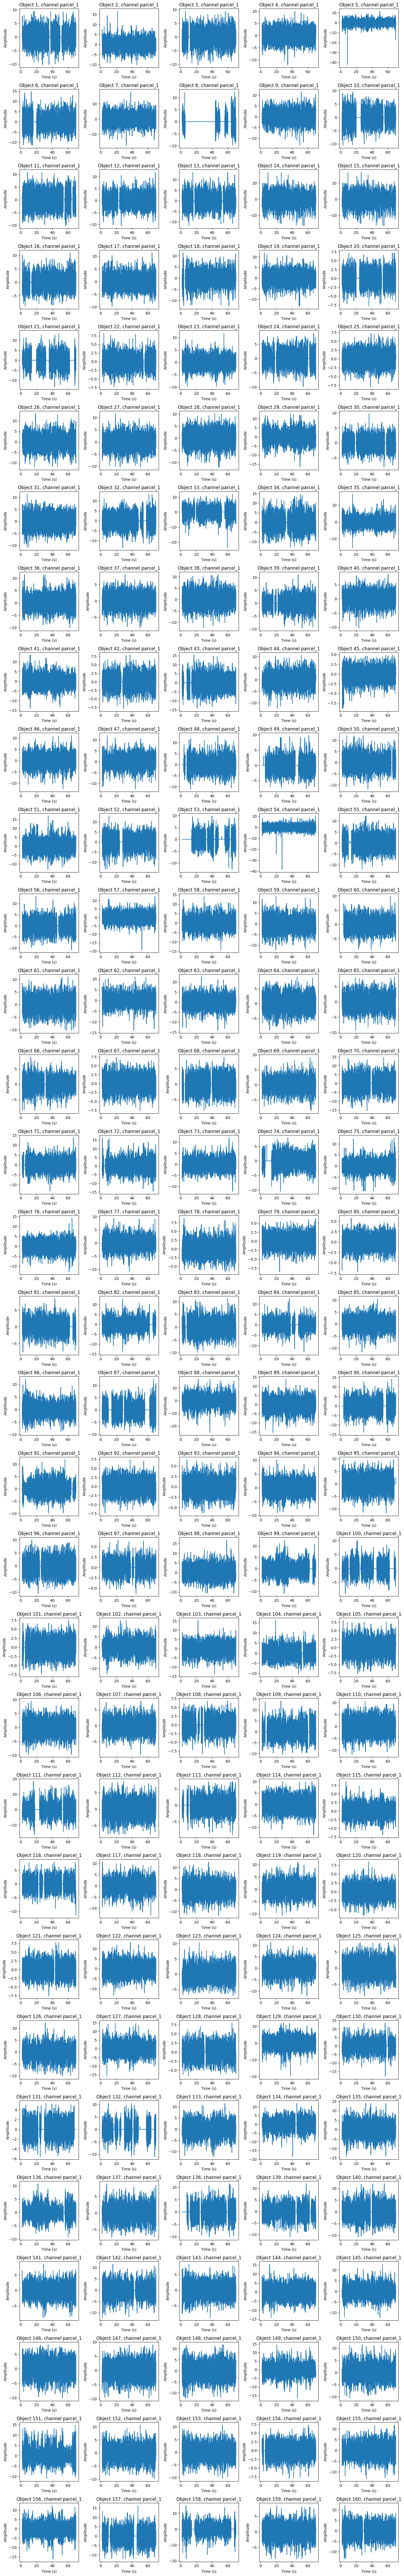

In [ ]:
import math
# Count number of column and row for grid
num_objects = len(raws)
ncols = 5
nrows = math.ceil(num_objects / ncols)

# Create figure with many subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))

# Make sure the axes is 2D array
axes = axes.flatten()

# Loop over all subject
for index in range(num_objects):
    data, times = get_data(index, channel_name)

    # Visualize the data of subject to subplots
    axes[index].plot(times, data[0])
    axes[index].set_title(f'Object {index + 1}, channel {channel_name}')
    axes[index].set_xlabel('Time (s)')
    axes[index].set_ylabel('Amplitude')

# Hide the plot if is is empty
for index in range(num_objects, len(axes)):
    axes[index].axis('off')

# Show plot
plt.tight_layout()
plt.show()

### Test with a Simple Model (This is not a training file, it's only for testing the data)


In [ ]:
# Normalization
data_arr1 = (data_arr - data_arr.mean(axis=-1, keepdims=True)) / data_arr.std(axis=-1, keepdims=True)




### Prepare data to train model

In [ ]:
import numpy as np

def window_eeg_data(data, window_size, step_size):
    """
    Splits EEG data into smaller windows.

    Args:
        data: NumPy array of shape (num_subjects, num_channels, num_samples).
        window_size: Number of samples in each window.
        step_size: Step size for sliding the window.

    Returns:
        windows: Array of shape (num_windows, num_channels, window_size).
    """
    num_subjects, num_channels, num_samples = data.shape
    windows = []

    for subject in range(num_subjects):
        for start in range(0, num_samples - window_size + 1, step_size):
            window = data[subject, :, start:start + window_size]
            windows.append(window)

    return np.array(windows)

# Parameters
window_size = 500  # e.g., 500 samples (1 window ~ 1s if sampling rate is 500 Hz)
step_size = 250  # Overlap of 50% (or choose 500 for non-overlapping windows)

# Apply windowing
windowed_data = window_eeg_data(data_arr, window_size, step_size)
print("Windowed data shape:", windowed_data.shape)

num_samples = data_arr.shape[2]
# Calculate the number of windows per subject
num_windows_per_subject = (num_samples - window_size) // step_size + 1 # Added this line to compute num_windows_per_subject
windowed_labels = np.repeat(labels, num_windows_per_subject)


Windowed data shape: (10720, 52, 500)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(windowed_data, windowed_labels, test_size=0.3, random_state=42)


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

class EEGDataset(Dataset):
    def __init__(self, signals, labels):
        self.signals = torch.tensor(signals, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.signals)

    def __getitem__(self, idx):
        signal = self.signals[idx].transpose(0, 1)  # Chuyển (52, 2500) -> (2500, 52)
        return signal, self.labels[idx]


In [ ]:
train_dataset = EEGDataset(X_train, y_train)
val_dataset = EEGDataset(X_val, y_val)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

### Model RNN

In [ ]:
import torch
import torch.nn as nn

class EEG_GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(EEG_GRU, self).__init__()
        # Thay LSTM bằng GRU
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Forward pass qua GRU
        out, _ = self.gru(x)
        # Chọn hidden state cuối cùng của chuỗi (câu cuối cùng trong chuỗi)
        out = self.fc(out[:, -1, :])
        return out

# Tham số mô hình
input_size = 52  # Số kênh EEG
hidden_size = 128  # Số neuron ẩn
num_layers = 2  # Số lớp GRU
output_size = 1  # Tuổi (giá trị liên tục)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EEG_GRU(input_size, hidden_size, num_layers, output_size).to(device)
print(model)


EEG_GRU(
  (gru): GRU(52, 128, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


### Train model

In [ ]:
import torch.optim as optim
import torch.nn as nn

# Initialize training parameters
min_val = float('inf')  # Set to infinity for easier comparison
min_val_epoch = 0
patience = 5  # Number of epochs with no improvement before stopping
patience_counter = 0  # Counter for epochs without improvement
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 106

# Training and validation loop
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_loss = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)

        # Forward pass
        output = model(inputs)
        loss = criterion(output, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Compute average training loss
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}")

    # Validation phase
    model.eval()
    val_loss = 0

    with torch.no_grad():  # Disable gradient calculation for validation
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)

            # Forward pass
            output = model(inputs)
            loss = criterion(output, targets)

            val_loss += loss.item()

    # Compute average validation loss
    average_val_loss = val_loss / len(val_loader)

    # Update minimum validation loss and epoch
    if average_val_loss < min_val:
        min_val = average_val_loss
        min_val_epoch = epoch
        patience_counter = 0  # Reset patience counter
    else:
        patience_counter += 1  # Increment the patience counter

    print(f"Epoch {epoch + 1}/{num_epochs}, Val Loss: {average_val_loss:.4f}, Min Val Loss: {min_val:.4f}, Min Val Epoch: {min_val_epoch}")

    # Early stopping condition
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch + 1} due to no improvement in validation loss.")
        break


Epoch 1/106, Loss: 17.6408
Epoch 1/106, Val Loss: 18.0512, Min Val Loss: 18.0512, Min Val Epoch: 0
Epoch 2/106, Loss: 17.3338
Epoch 2/106, Val Loss: 17.9963, Min Val Loss: 17.9963, Min Val Epoch: 1
Epoch 3/106, Loss: 17.8350
Epoch 3/106, Val Loss: 17.7072, Min Val Loss: 17.7072, Min Val Epoch: 2
Epoch 4/106, Loss: 17.4902
Epoch 4/106, Val Loss: 17.5973, Min Val Loss: 17.5973, Min Val Epoch: 3
Epoch 5/106, Loss: 16.3851
Epoch 5/106, Val Loss: 17.3375, Min Val Loss: 17.3375, Min Val Epoch: 4
Epoch 6/106, Loss: 15.4721
Epoch 6/106, Val Loss: 16.5918, Min Val Loss: 16.5918, Min Val Epoch: 5
Epoch 7/106, Loss: 14.8928
Epoch 7/106, Val Loss: 16.3913, Min Val Loss: 16.3913, Min Val Epoch: 6
Epoch 8/106, Loss: 14.0607
Epoch 8/106, Val Loss: 15.5551, Min Val Loss: 15.5551, Min Val Epoch: 7
Epoch 9/106, Loss: 12.7372
Epoch 9/106, Val Loss: 16.9807, Min Val Loss: 15.5551, Min Val Epoch: 7
Epoch 10/106, Loss: 11.9888
Epoch 10/106, Val Loss: 15.7041, Min Val Loss: 15.5551, Min Val Epoch: 7
Epoch 11

In [ ]:
# Save loss
total_mae = 0
num_batches = 0

# loop over batch
for inputs, targets in val_loader:
    inputs, targets = inputs.to(device), targets.to(device).unsqueeze(1)
    output = model(inputs)

    # Calculate for current batch
    batch_mae = torch.mean(torch.abs(output - targets))
    total_mae += batch_mae.item()
    num_batches += 1

# Calculate average mae
avg_mae = total_mae / num_batches
print(f"Mean Absolute Error (Validation): {avg_mae}")


Mean Absolute Error (Validation): 10.119957505767026
